In [7]:
#Part a) 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Number of simulations
years = 30
investment = 1000
mu_v = [0.1, 0.2, 0.4]  # Example mean return for stocks
sigma_v = [0.4, 0.8, 1.6]  # Example volatility for stocks
p_v = [0.3, 0.5, 0.7]  # Example initial stock allocation
c_v = [0.3, 0.5, 0.7]  # Example allocation decrease rate
R_bond = np.exp(0.01)  # Risk-free bond return

# Function to calculate V30 for each simulation
def simulate_V30(mu, sigma, p, c, years, R_bond):
    V = 0  # Initial portfolio value
    for k in range(1, years + 1):
        # Calculate allocation fraction for stocks in year k
        p_k = p * (1 - c * (k - 1) / years)
        # Simulate the stock return R_k = e^(mu + sigma * Z_k)
        R_stock = np.exp(mu + sigma * np.random.normal())
        # Update the portfolio value with rebalancing
        V = (V + investment) * (p_k * R_stock + (1 - p_k) * R_bond)
    return V


result = {} 
# Simulate V30 for n samples
for mu in mu_v:
    for sigma in sigma_v: 
        for p in p_v:
            for c in c_v:
                key = f"mu={mu}, sigma={sigma}, p={p}, c={c}" 

                V30_samples = [simulate_V30(mu, sigma, p, c, years, R_bond) for _ in range(n)]

                result[key] = {
                    "mean": np.mean(V30_samples),
                    "std": np.std(V30_samples),
                    "median": np.median(V30_samples),
                    "quantiles": np.percentile(V30_samples, [5, 25, 50, 75, 95]),
                    "samples": V30_samples
                }



# Analyze and Plot Results
# Example: Compare means for different parameter sets
for key, stats in result.items():
    print(f"{key} -> Mean: {stats['mean']}, Std: {stats['std']}, Median: {stats['median']}")
    quantiles = stats["quantiles"]
    print(f"Quantiles (5%, 25%, 50%, 75%, 95%): {quantiles}")



mu=0.1, sigma=0.4, p=0.3, c=0.3 -> Mean: 77780.94285267235, Std: 39012.96488730074, Median: 68555.57906078738
Quantiles (5%, 25%, 50%, 75%, 95%): [ 37535.28933268  51992.80560426  68555.57906079  92249.92423726
 148386.95533898]
mu=0.1, sigma=0.4, p=0.3, c=0.5 -> Mean: 69303.68474034962, Std: 31525.70600646201, Median: 61957.19455040952
Quantiles (5%, 25%, 50%, 75%, 95%): [ 37338.2893304   50090.17024143  61957.19455041  80281.79949987
 123733.26417499]
mu=0.1, sigma=0.4, p=0.3, c=0.7 -> Mean: 61066.62915885504, Std: 19377.601165623415, Median: 57936.20501179011
Quantiles (5%, 25%, 50%, 75%, 95%): [36841.02363803 46958.65702874 57936.20501179 70977.35619293
 96925.17550378]
mu=0.1, sigma=0.4, p=0.5, c=0.3 -> Mean: 135824.93131868064, Std: 112520.42438232857, Median: 103205.45979061289
Quantiles (5%, 25%, 50%, 75%, 95%): [ 38165.8563494   66071.32693021 103205.45979061 158992.75418855
 369485.15758517]
mu=0.1, sigma=0.4, p=0.5, c=0.5 -> Mean: 112321.80761395713, Std: 80559.40185634614, 

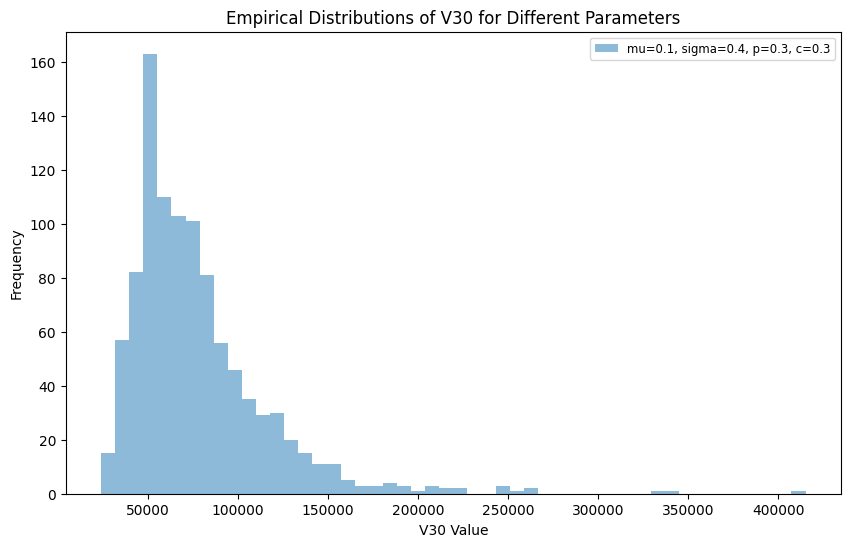

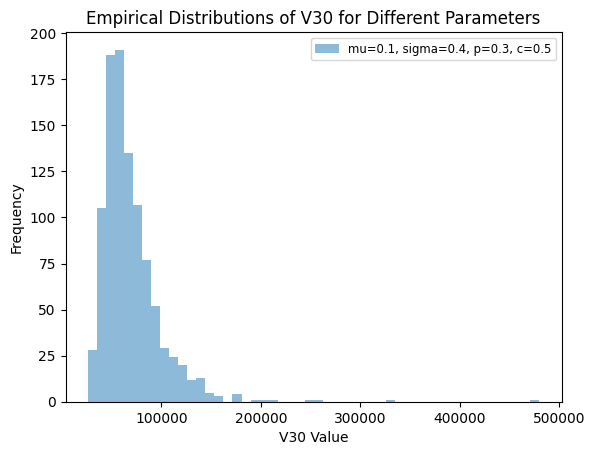

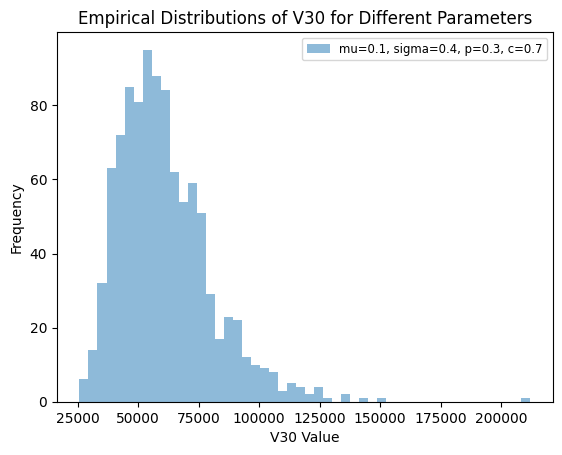

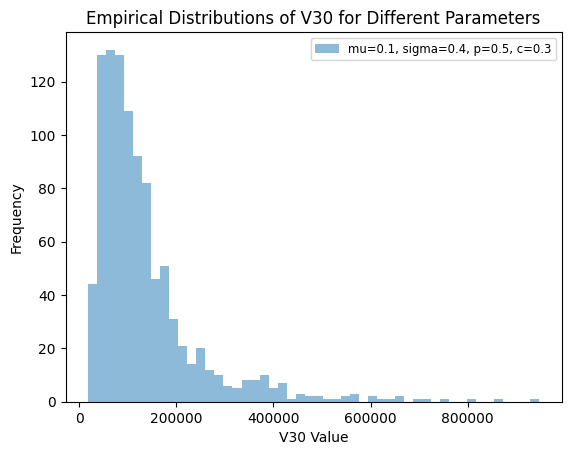

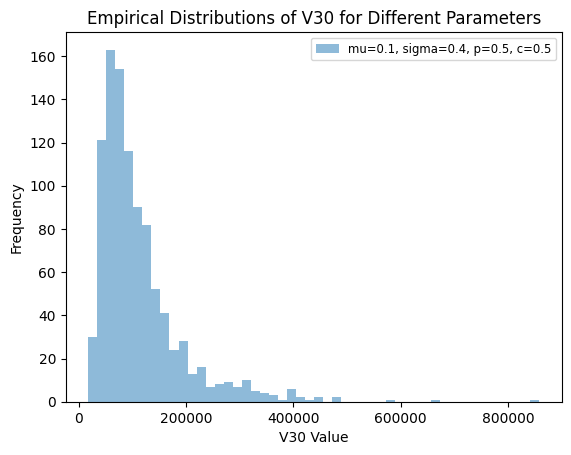

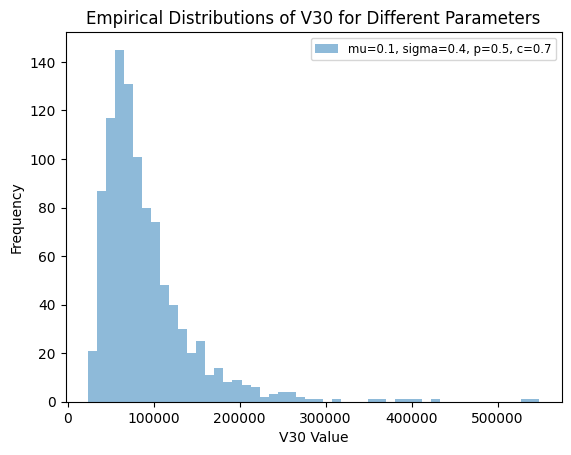

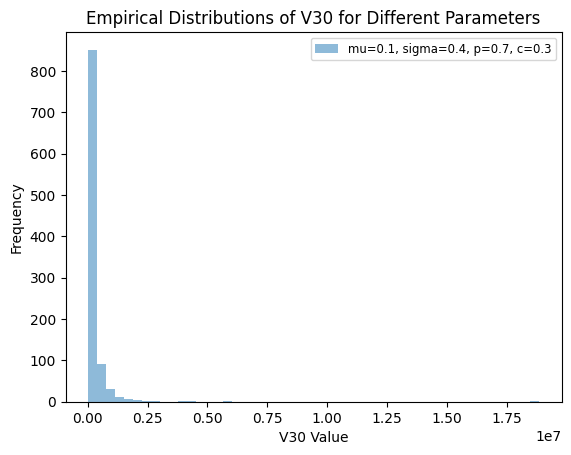

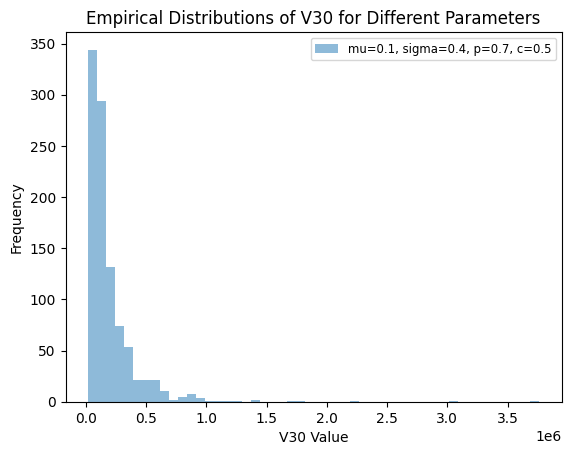

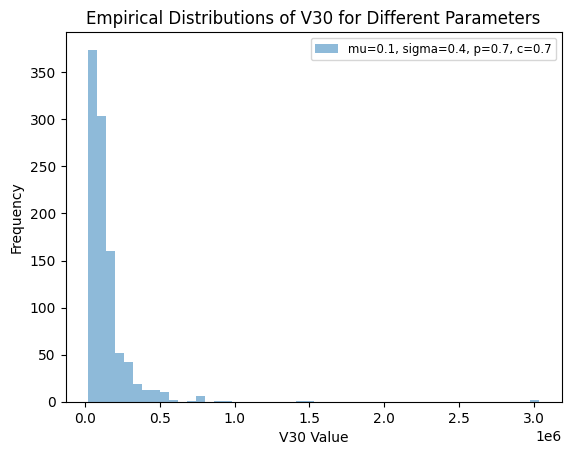

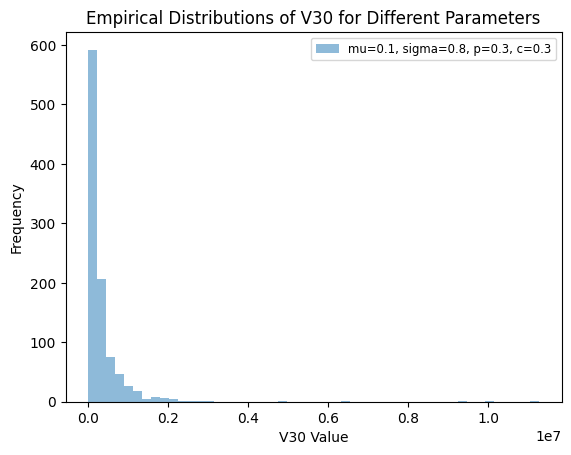

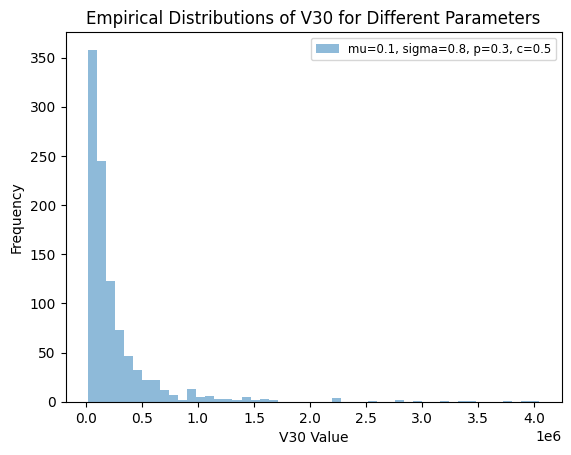

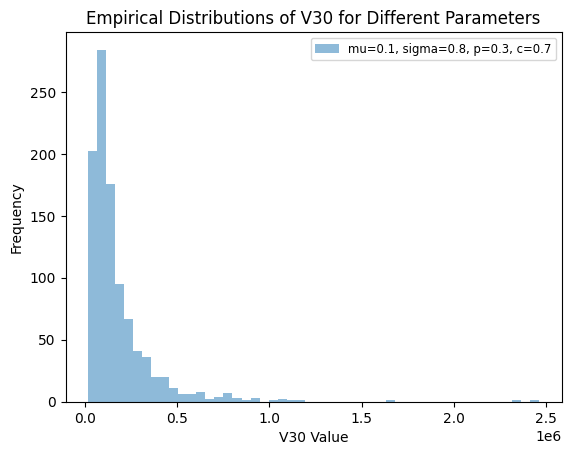

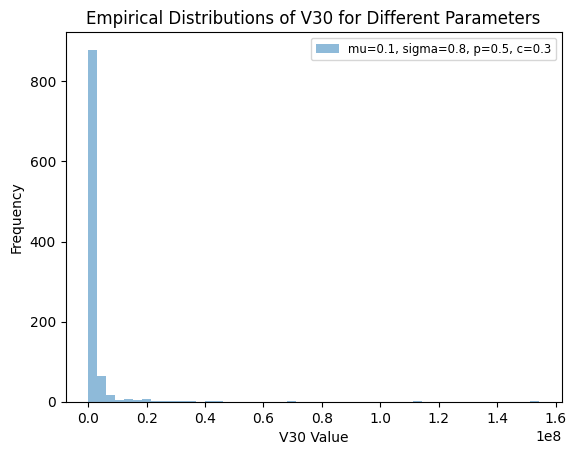

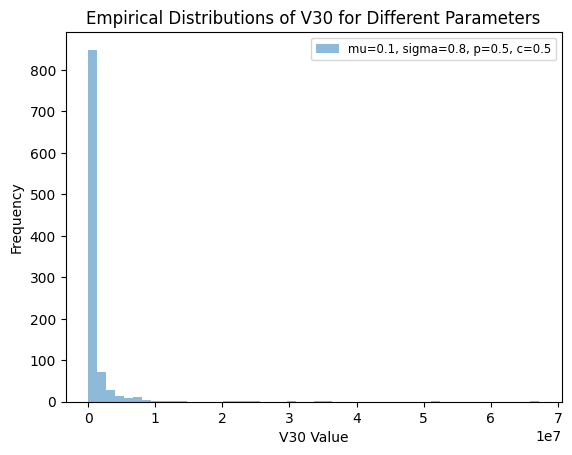

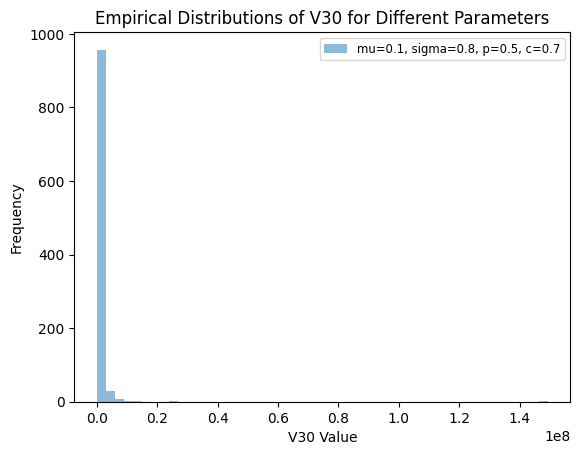

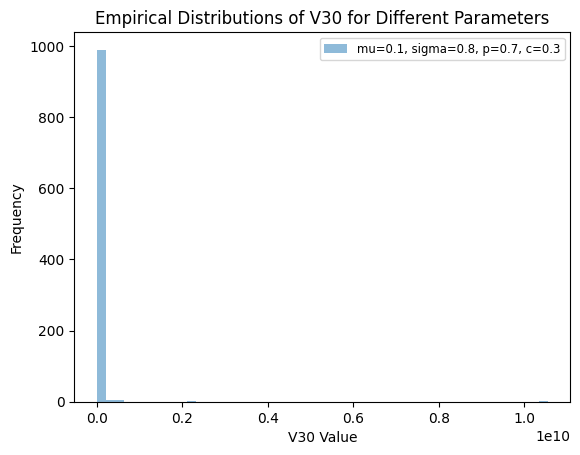

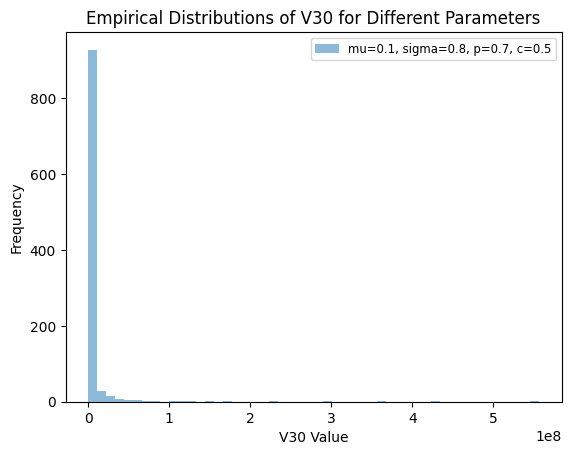

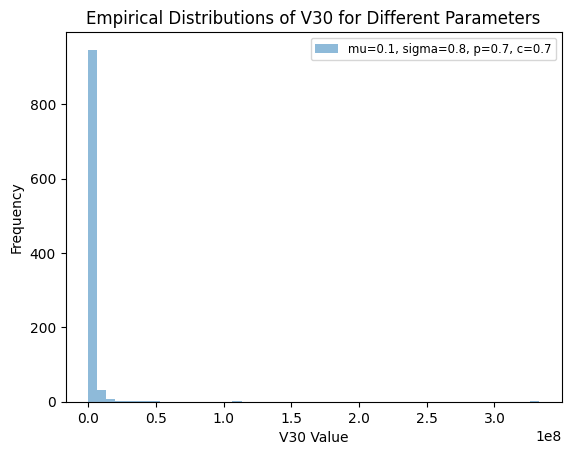

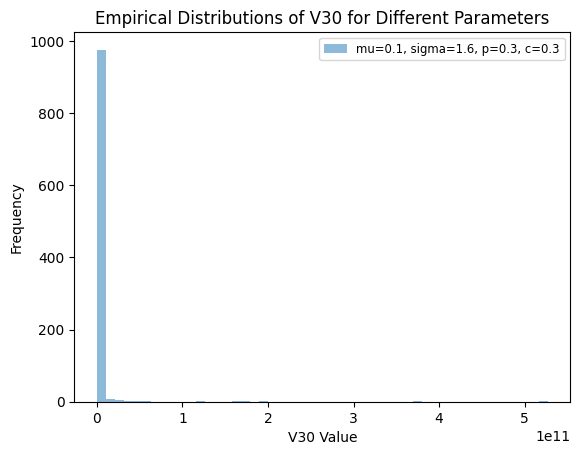

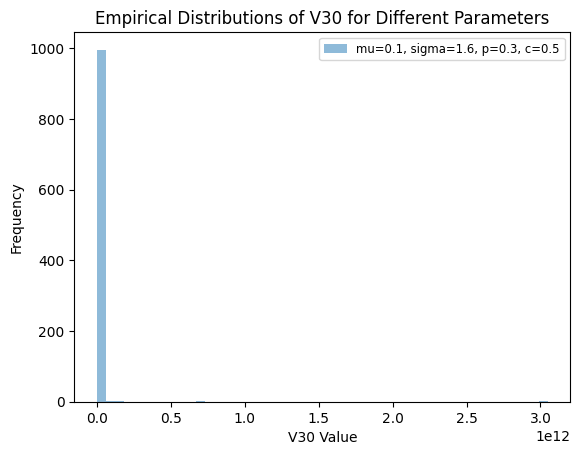

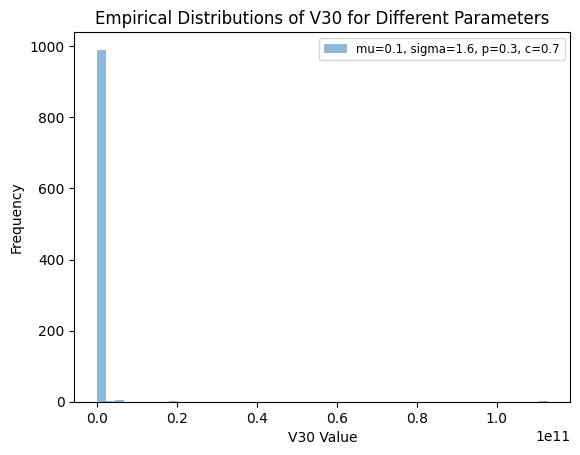

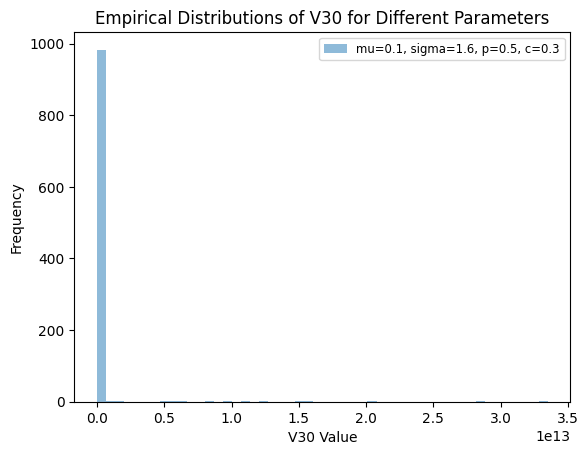

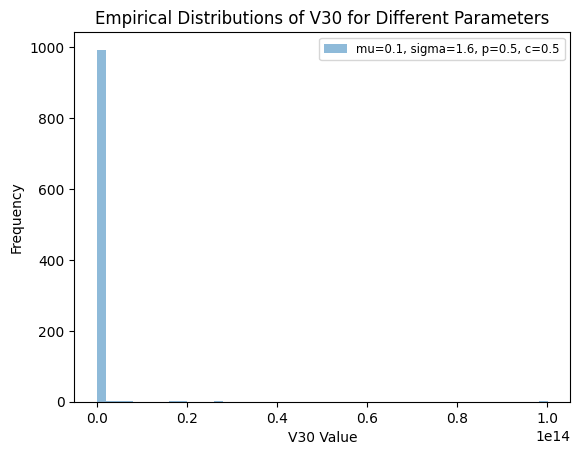

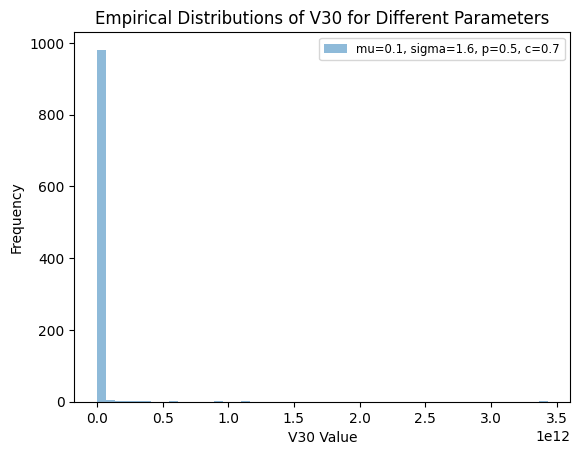

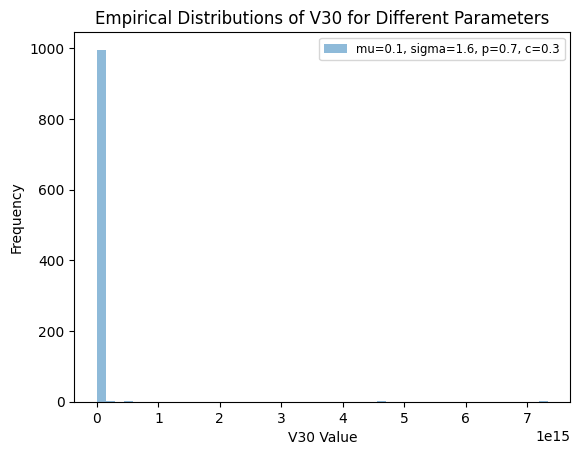

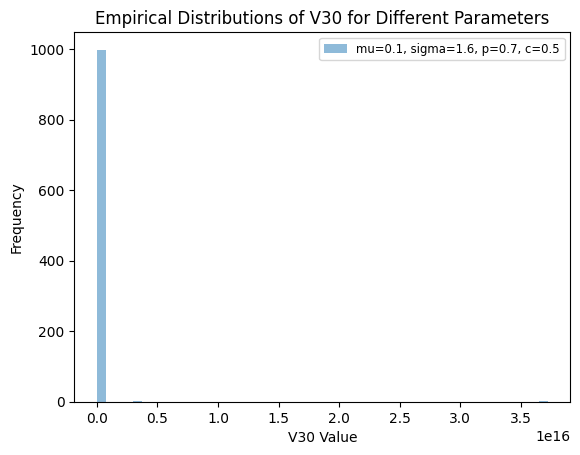

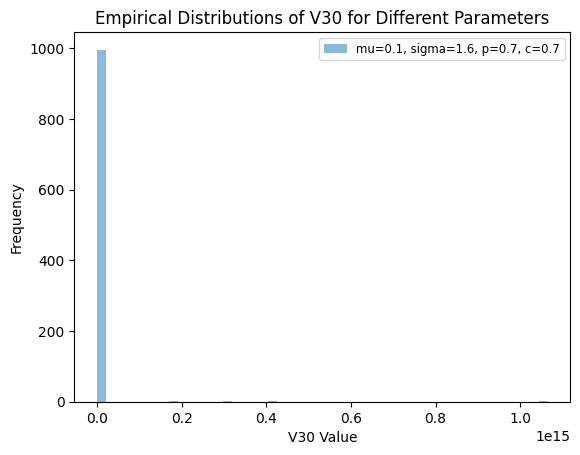

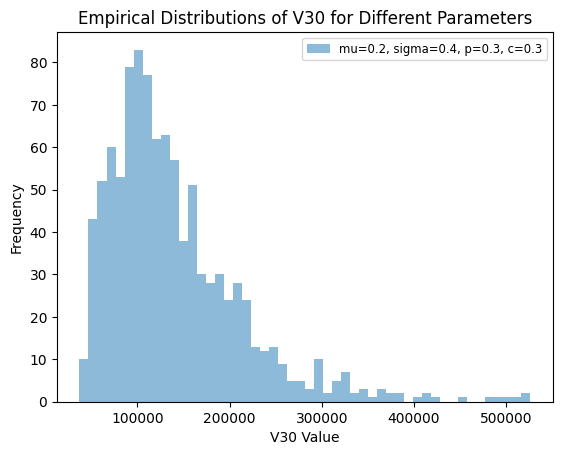

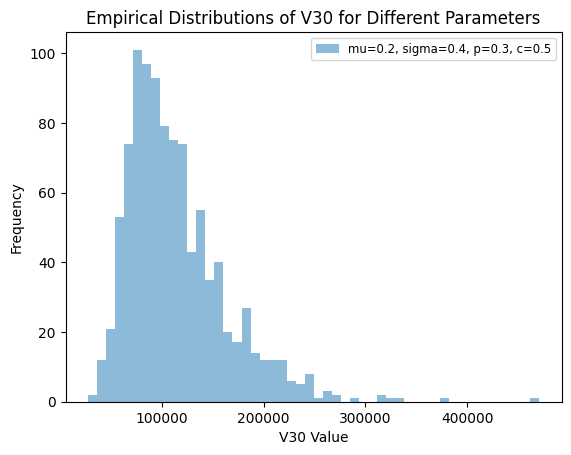

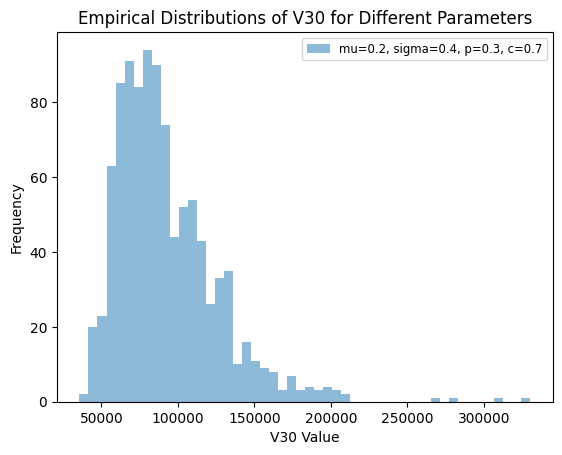

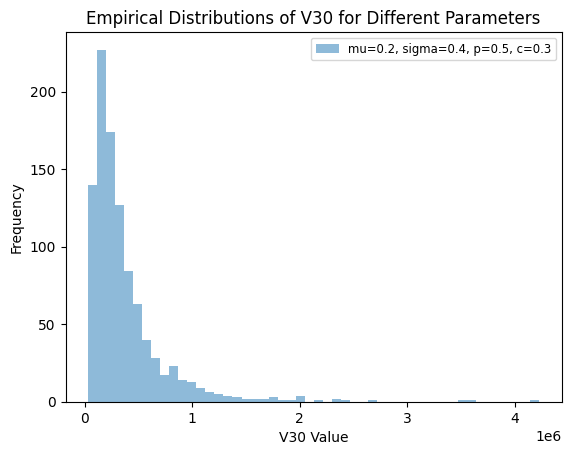

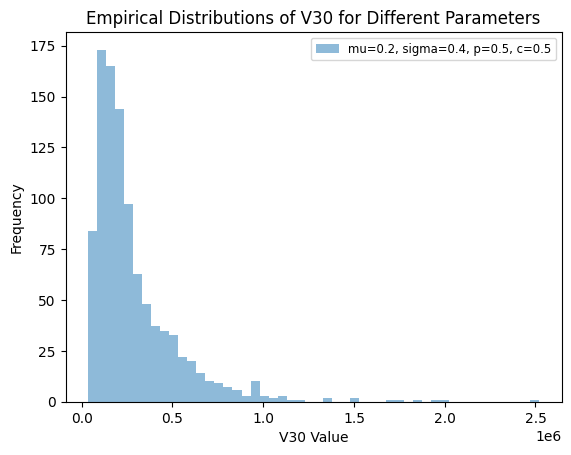

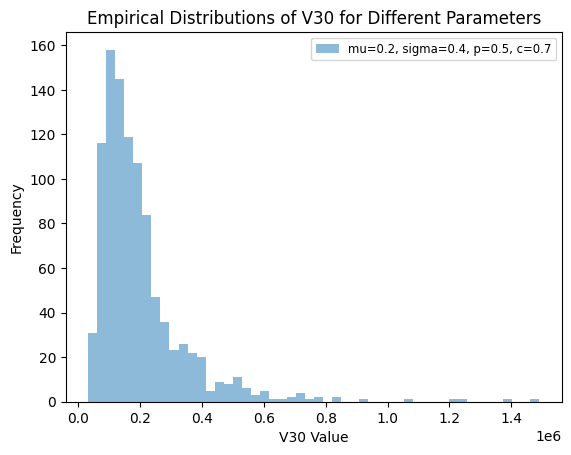

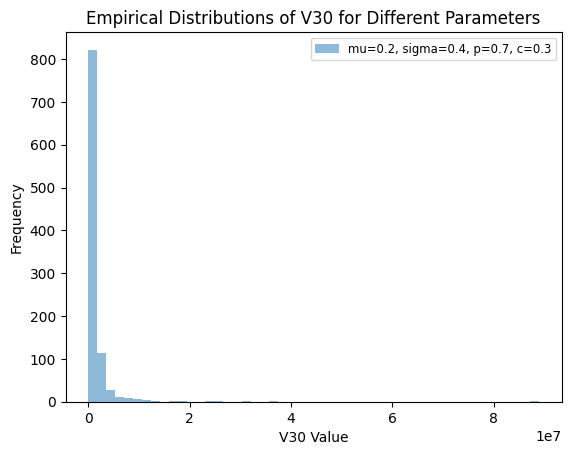

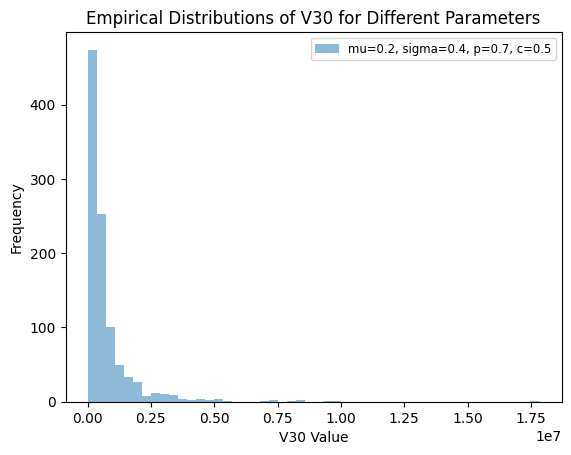

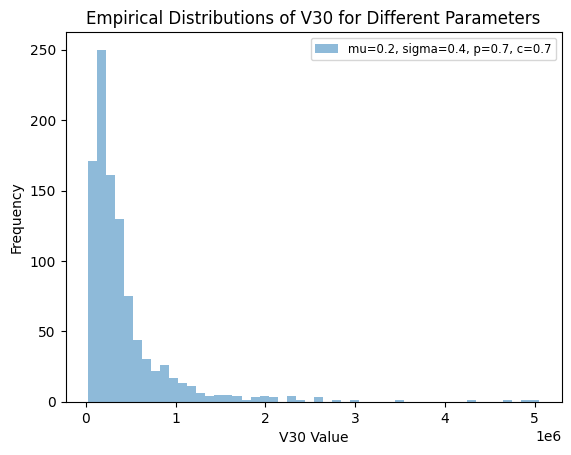

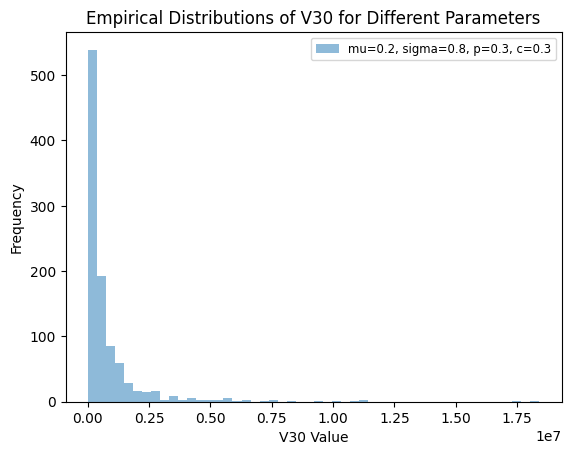

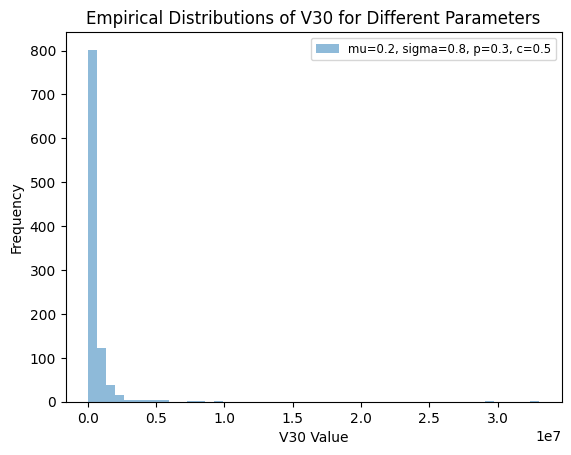

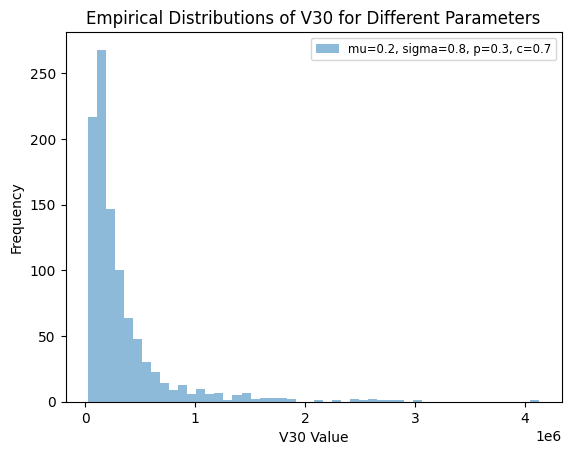

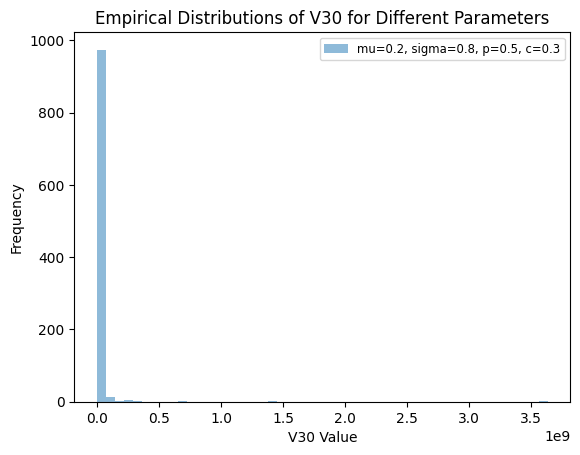

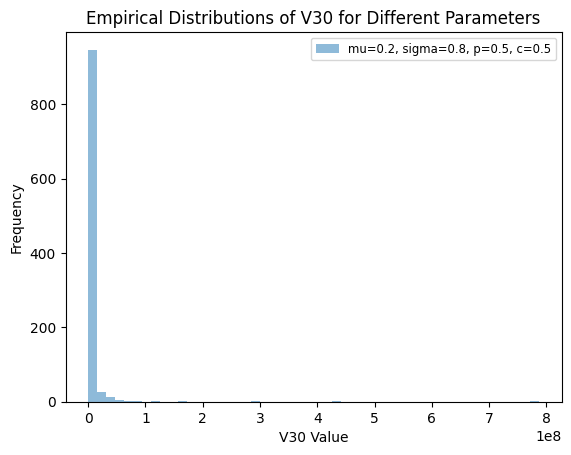

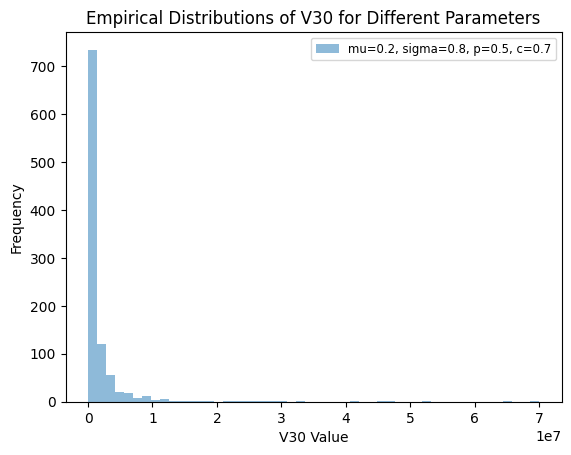

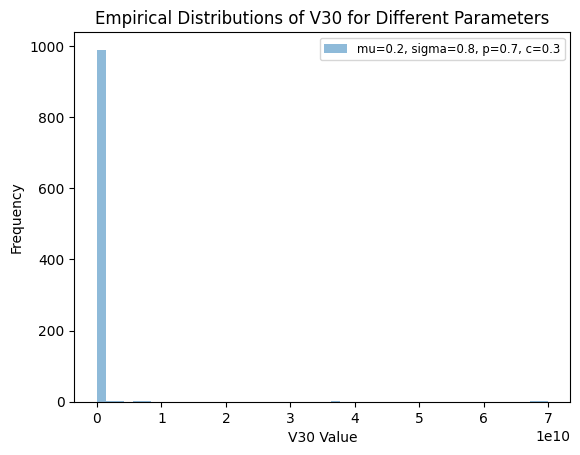

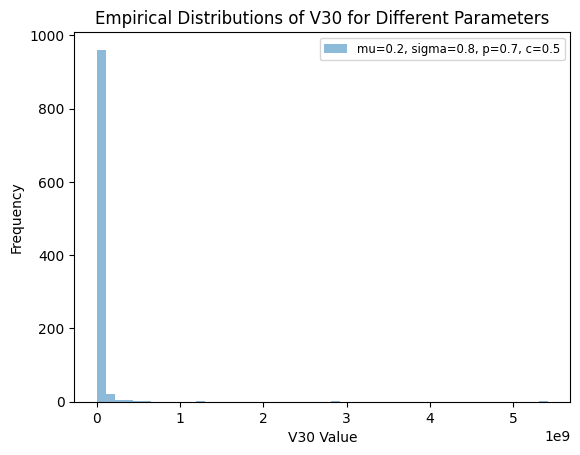

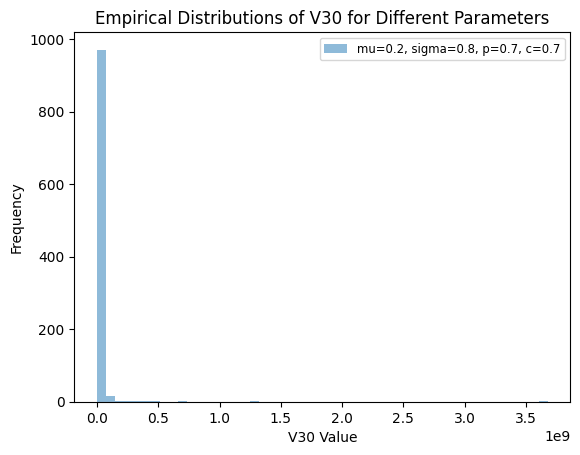

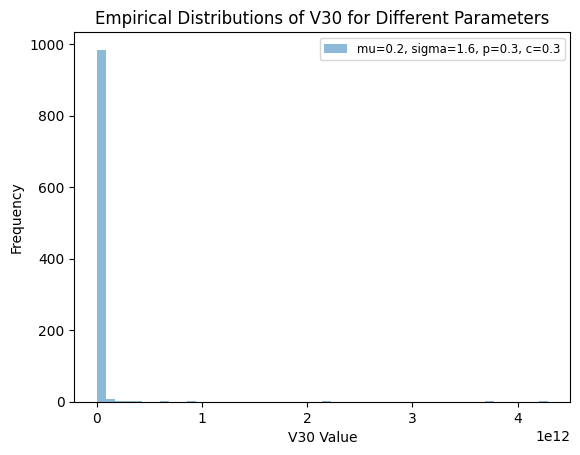

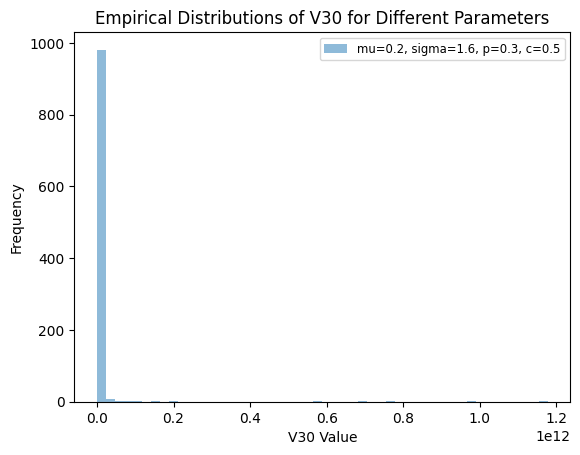

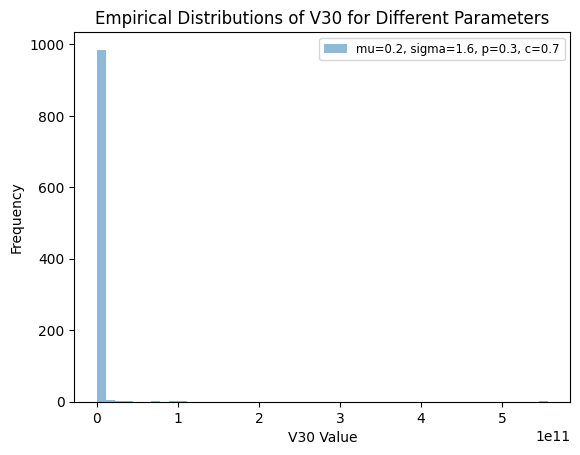

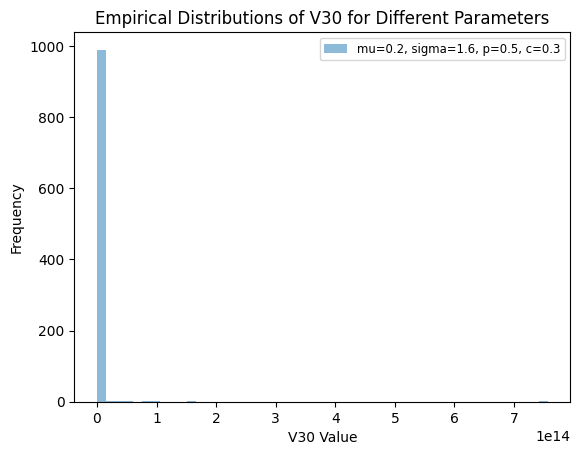

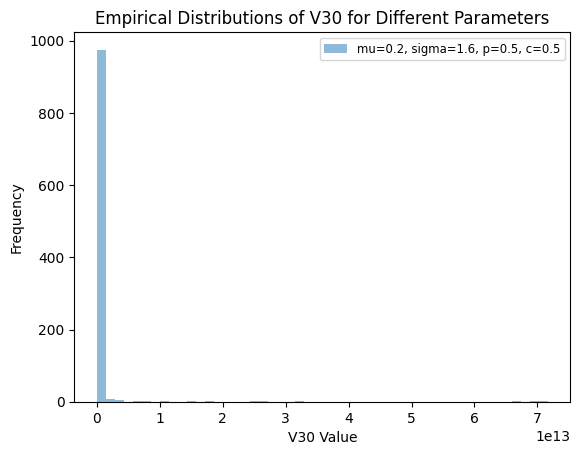

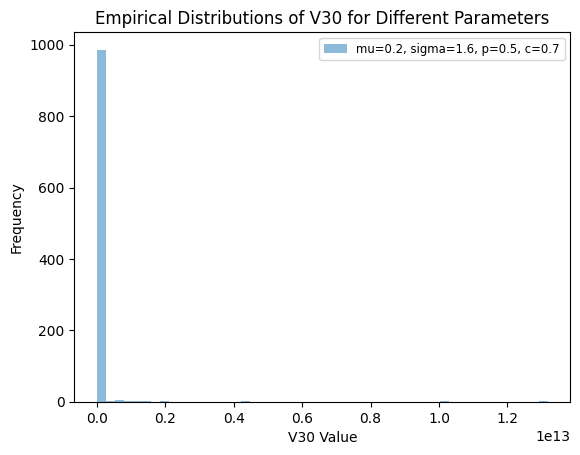

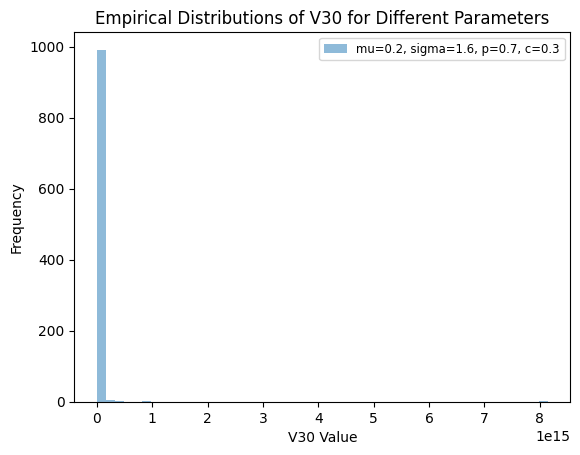

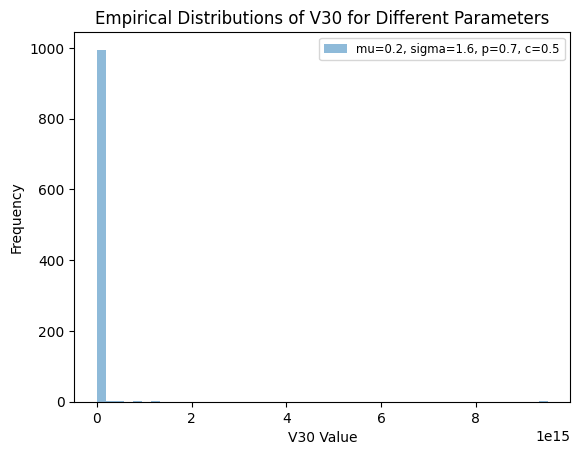

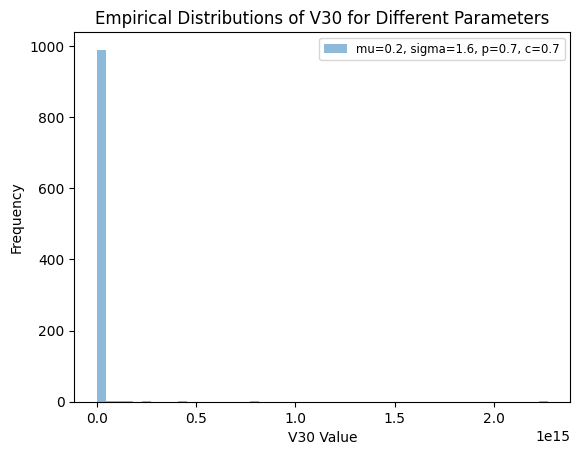

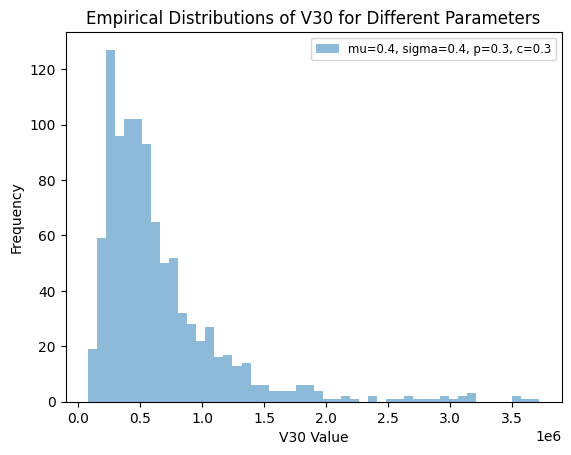

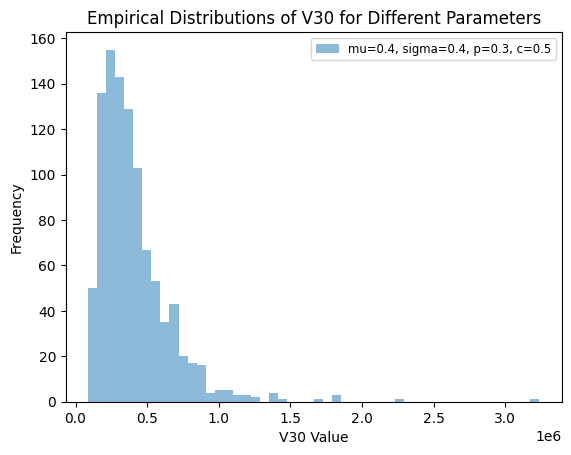

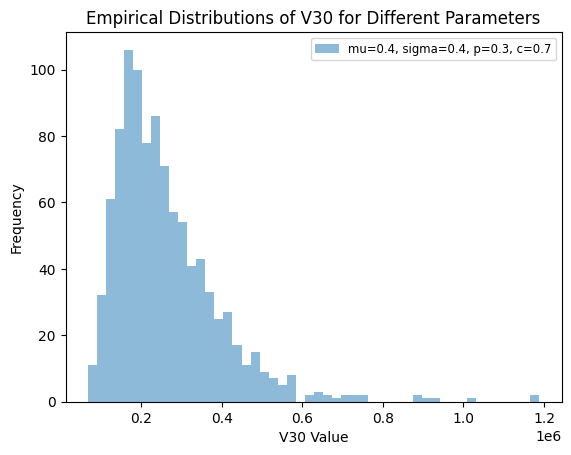

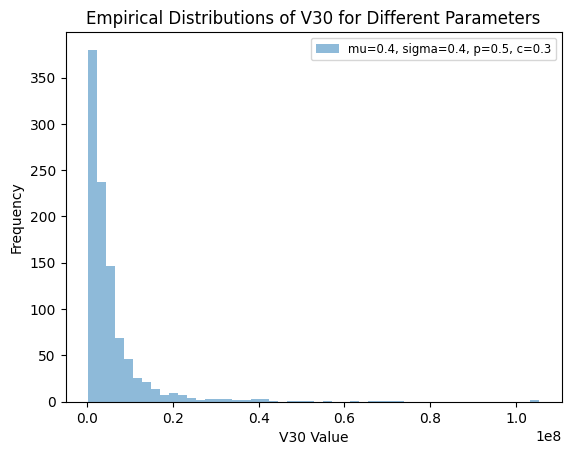

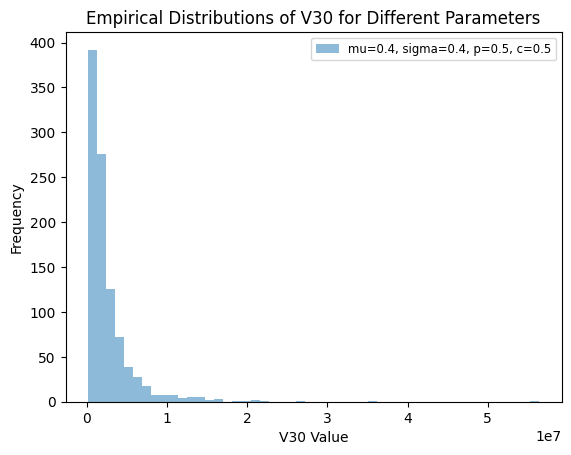

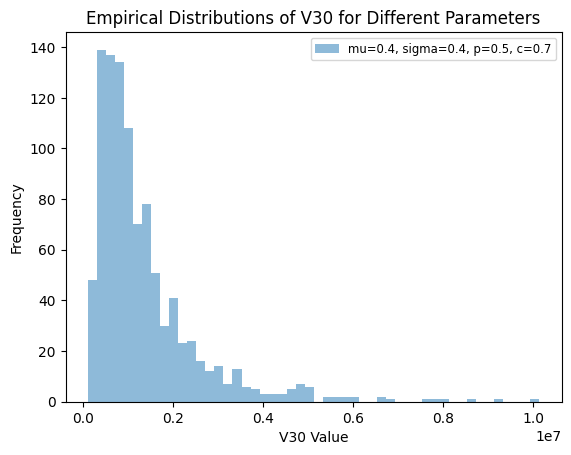

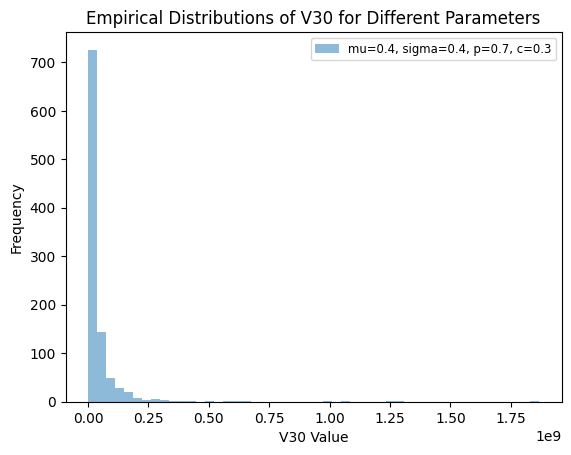

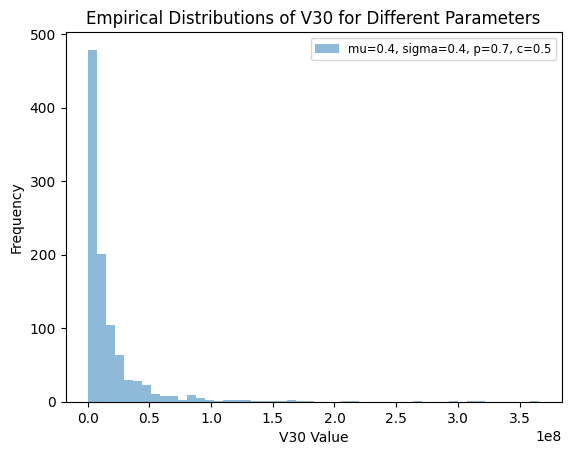

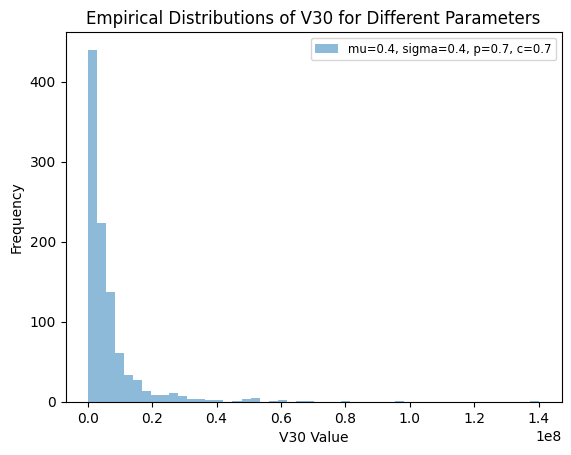

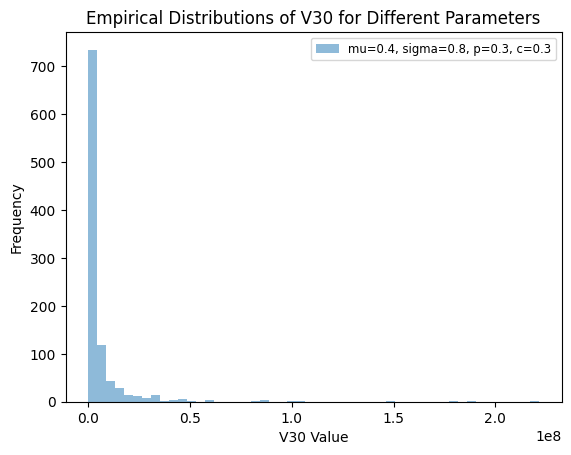

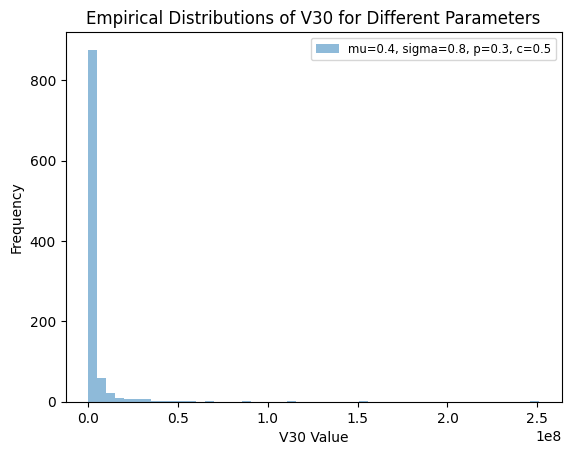

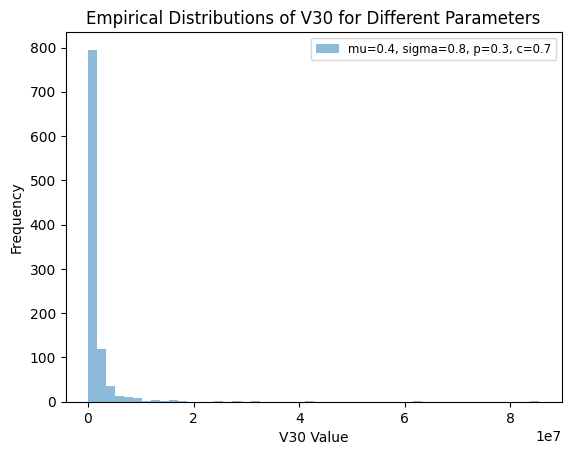

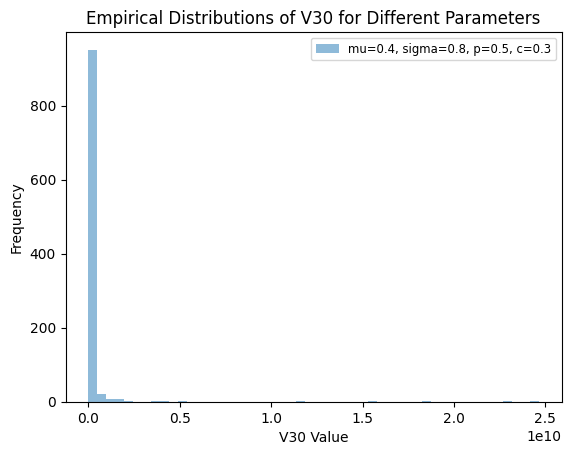

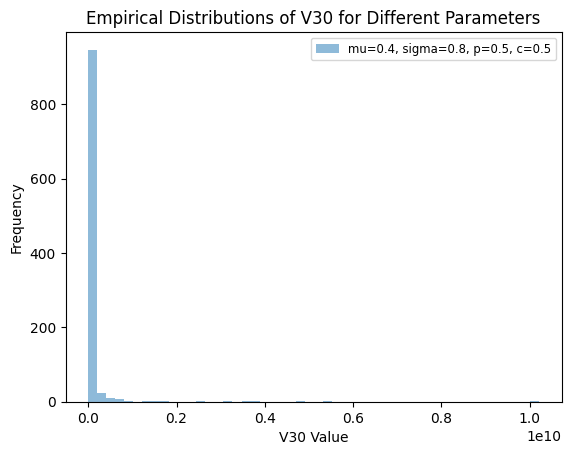

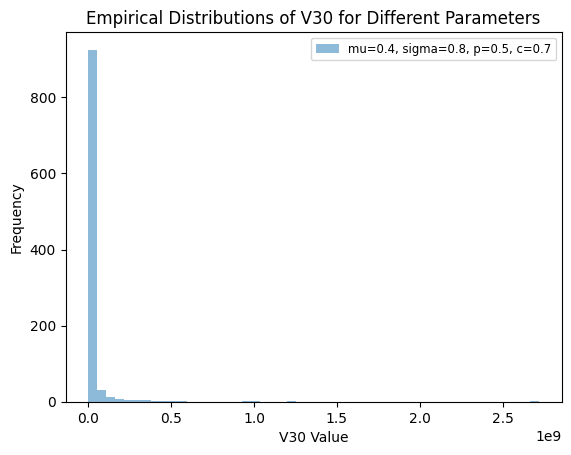

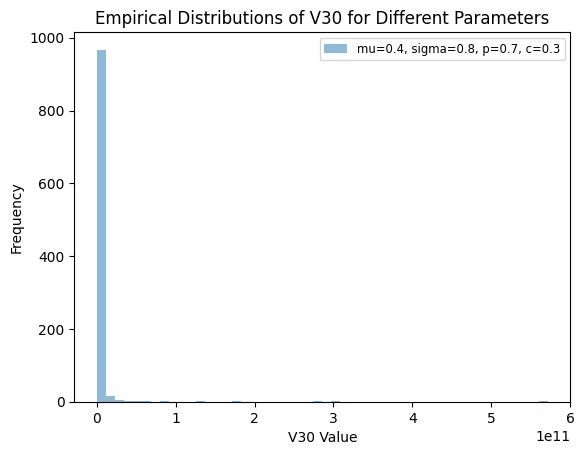

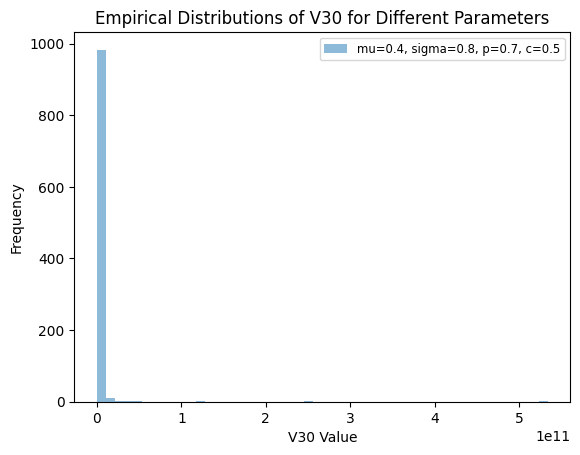

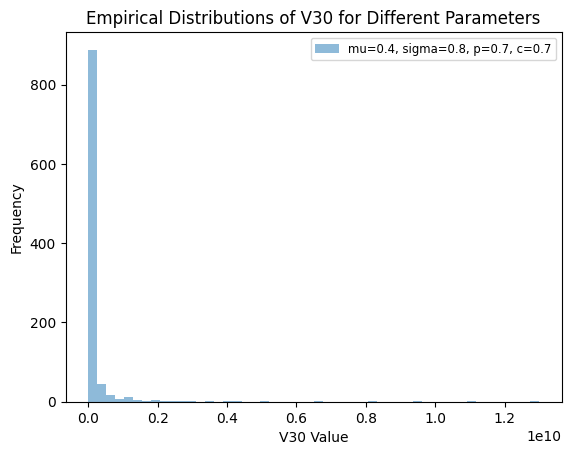

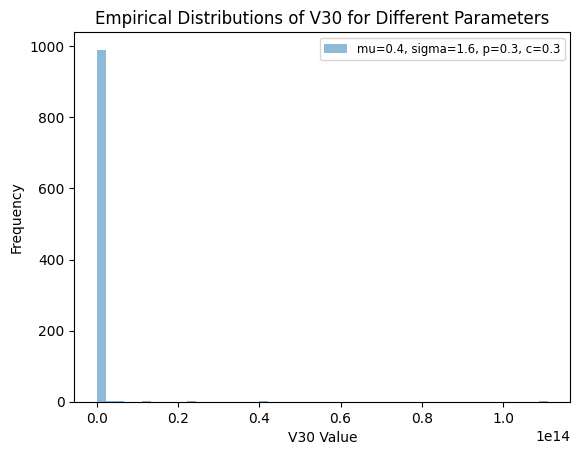

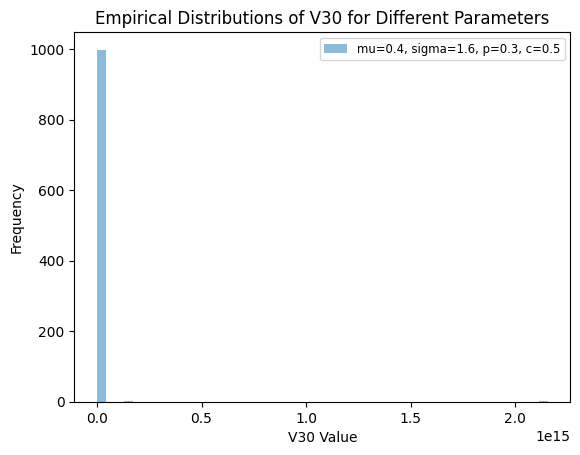

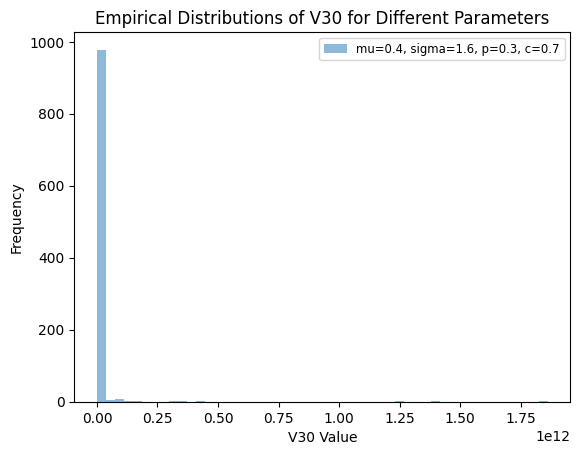

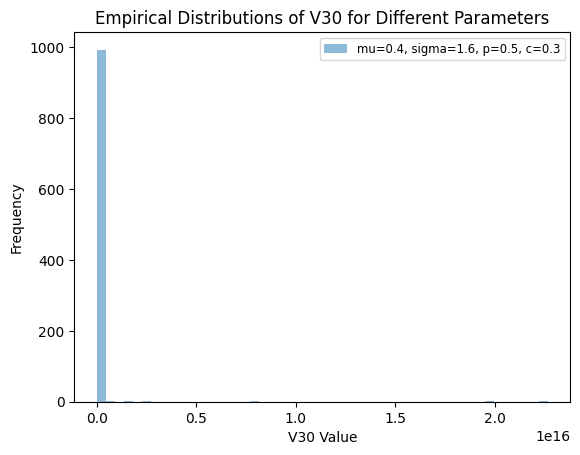

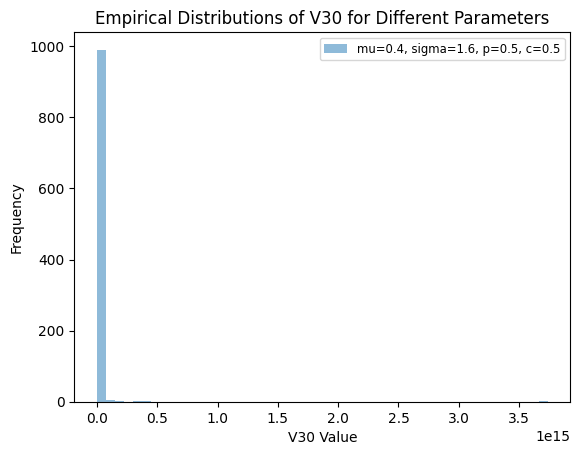

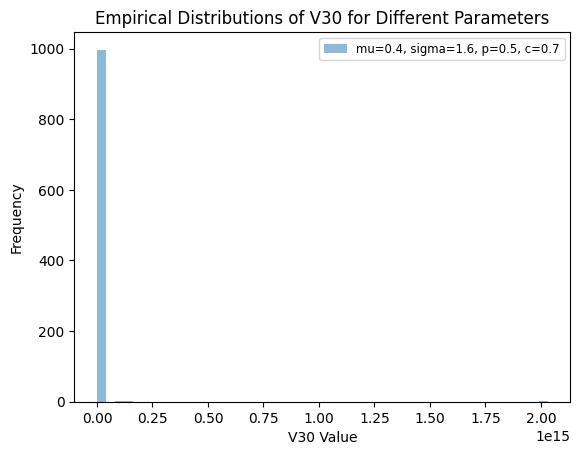

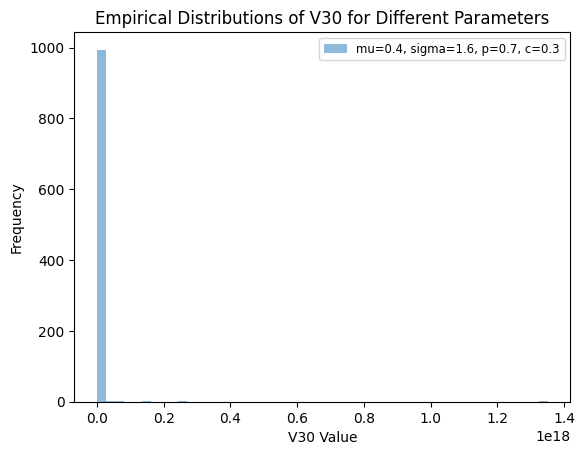

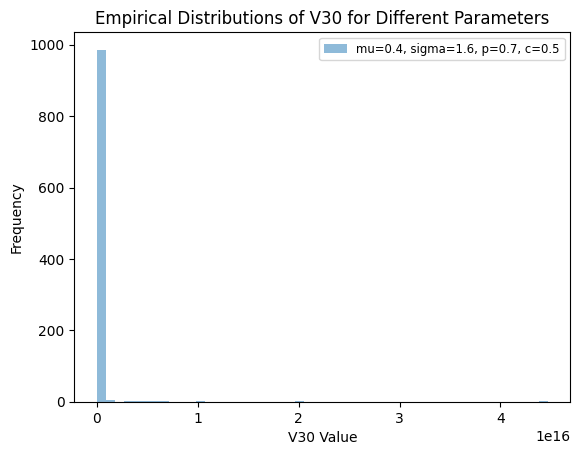

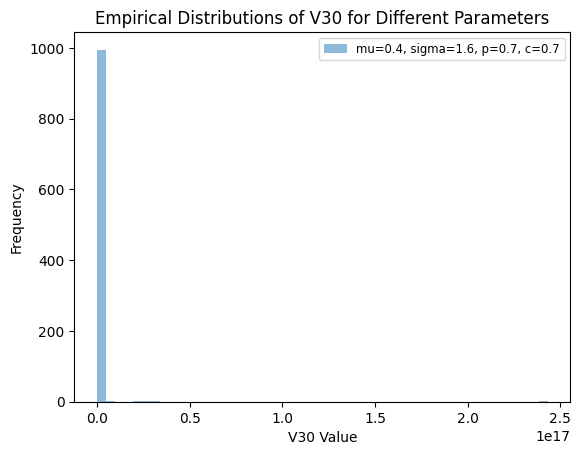

In [9]:
# Example: Plot distributions for selected parameter sets
plt.figure(figsize=(10, 6))
for key, stats in result.items():
    plt.hist(stats["samples"], bins=50, alpha=0.5, label=key)
    plt.title("Empirical Distributions of V30 for Different Parameters")
    plt.xlabel("V30 Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right', fontsize='small')
    plt.show()

    

# part **b**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
n = 10000  # Number of simulations
years = 30
investment = 1000
mu = 0.03
sigma = 0.2
R_bond = np.exp(0.01)

# Ranges for p and c
p_values = np.linspace(0.5, 0.9, 5)  # Range of initial stock allocations
c_values = np.linspace(0.2, 0.8, 4)  # Range of allocation decrease rates

# Constraints
threshold_quantile = 2e4  # Minimum 1%-quantile
max_std_dev = 5e5  # Maximum allowable standard deviation

# Function to calculate V30 for each simulation
def simulate_V30(mu, sigma, p, c, years, R_bond):
    V = 0  # Initial portfolio value
    for k in range(1, years + 1):
        # Calculate allocation fraction for stocks in year k
        p_k = p * (1 - c * (k - 1) / years)
        # Simulate the stock return R_k = e^(mu + sigma * Z_k)
        R_stock = np.exp(mu + sigma * np.random.normal())
        # Update the portfolio value with rebalancing
        V = (V + investment) * (p_k * R_stock + (1 - p_k) * R_bond)
    return V

# Store results for each (p, c)
results = []

for p in p_values:
    for c in c_values:
        # Simulate V30 for n samples
        V30_samples = [simulate_V30(mu, sigma, p, c, years, R_bond) for _ in range(n)]
        # Calculate statistics
        mean_V30 = np.mean(V30_samples)
        std_dev_V30 = np.std(V30_samples)
        quantile_1p = np.percentile(V30_samples, 1)
        results.append({
            "p": p, "c": c, "mean_V30": mean_V30, 
            "std_dev_V30": std_dev_V30, "quantile_1p": quantile_1p, "samples": V30_samples,
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Apply constraints: standard deviation and 1%-quantile
filtered_results = results_df[
    (results_df["quantile_1p"] > threshold_quantile) & 
    (results_df["std_dev_V30"] <= max_std_dev)
]

if filtered_results.empty:
    print("No parameter combinations satisfy the constraints.")
else:
    # Find optimal parameters: maximize mean_V30
    optimal_row = filtered_results.sort_values(by="mean_V30", ascending=False).iloc[0]

    # Report results
    optimal_p = optimal_row["p"]
    optimal_c = optimal_row["c"]
    optimal_mean_V30 = optimal_row["mean_V30"]
    optimal_std_dev = optimal_row["std_dev_V30"]
    optimal_quantile_1p = optimal_row["quantile_1p"]

    print("Optimal Parameters:")
    print(f"p: {optimal_p}, c: {optimal_c}")
    print(f"Mean E[V30]: {optimal_mean_V30}")
    print(f"Standard Deviation: {optimal_std_dev}")
    print(f"1%-Quantile F^-1_V30(0.01): {optimal_quantile_1p}")


Optimal Parameters:
p: 0.8, c: 0.4
Mean E[V30]: 53124.93509765544
Standard Deviation: 24736.84840490422
1%-Quantile F^-1_V30(0.01): 20441.760543032196


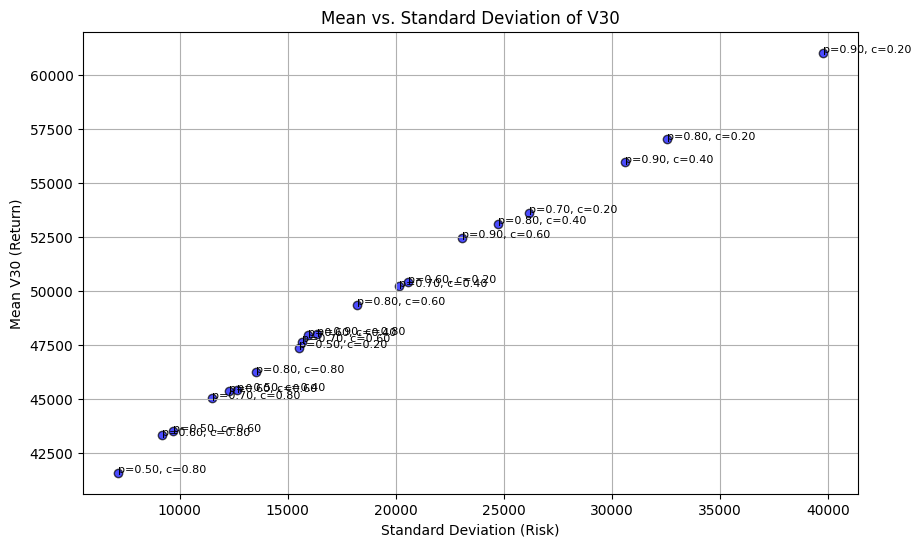

In [11]:
def plot_mean_vs_std(results_df):
    """
    Scatter plot of mean V30 vs. standard deviation.
    :param results_df: DataFrame with results
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df["std_dev_V30"], results_df["mean_V30"], c="blue", alpha=0.7, edgecolor="k")
    for _, row in results_df.iterrows():
        plt.text(row["std_dev_V30"], row["mean_V30"], f"p={row['p']:.2f}, c={row['c']:.2f}", fontsize=8)
    plt.title("Mean vs. Standard Deviation of V30")
    plt.xlabel("Standard Deviation (Risk)")
    plt.ylabel("Mean V30 (Return)")
    plt.grid(True)
    plt.show()

# Call scatterplot function
plot_mean_vs_std(results_df)


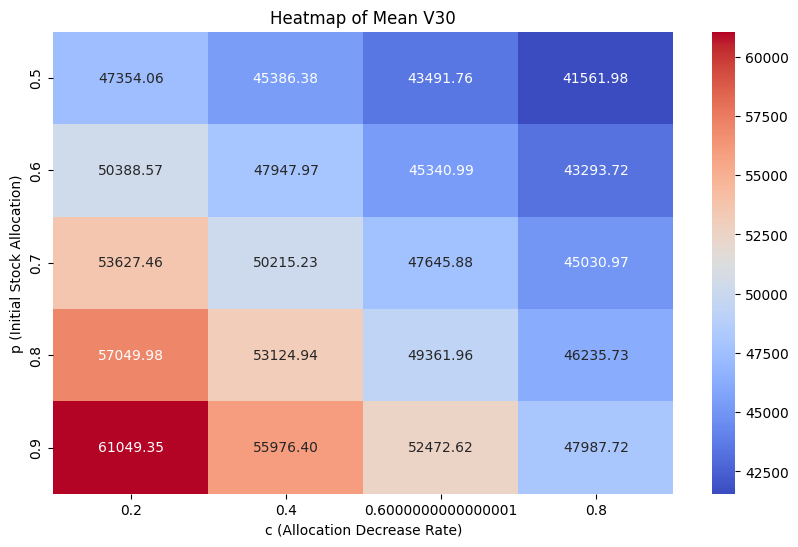

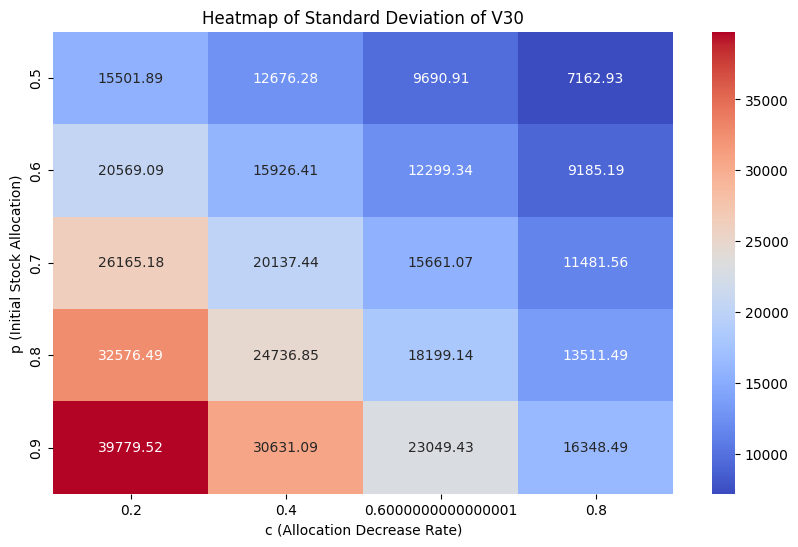

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(results_df, value_col, title):
    """
    Heatmap of a specific metric for (p, c) combinations.
    :param results_df: DataFrame with results
    :param value_col: Column name to use for the heatmap values
    :param title: Title for the heatmap
    """
    # Pivot the DataFrame for heatmap
    heatmap_data = results_df.pivot(index="p", columns="c", values=value_col)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.xlabel("c (Allocation Decrease Rate)")
    plt.ylabel("p (Initial Stock Allocation)")
    plt.show()

# Example Usage
# Heatmap of mean V30
plot_heatmap(results_df, "mean_V30", "Heatmap of Mean V30")

# Heatmap of standard deviation
plot_heatmap(results_df, "std_dev_V30", "Heatmap of Standard Deviation of V30")

/var/folders/m5/pfdc22k95x7737bmbkvn2xh00000gn/T/ipykernel_10634/268672936.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, vert=True, patch_artist=True)


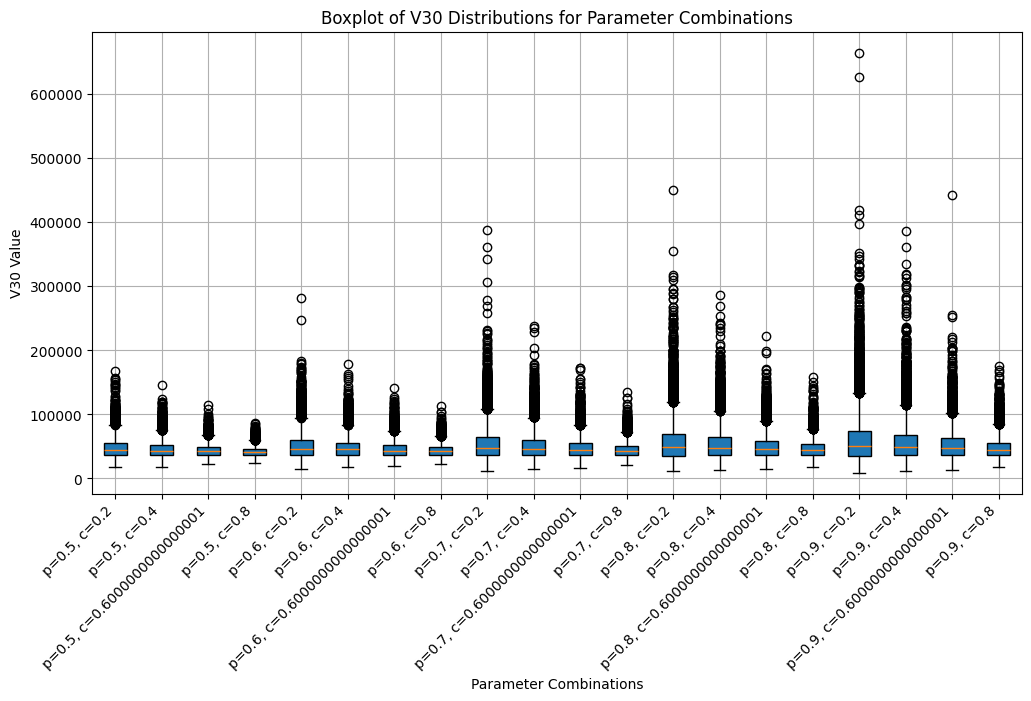

In [13]:
def plot_boxplots(results_df):
    """
    Plot boxplots for all (p, c) combinations.
    :param results_df: DataFrame with results
    """
    # Prepare data for boxplot
    labels = []
    data = []
    for _, row in results_df.iterrows():
        labels.append(f"p={row['p']}, c={row['c']}")
        data.append(row["samples"])

    plt.figure(figsize=(12, 6))
    plt.boxplot(data, labels=labels, vert=True, patch_artist=True)
    plt.title("Boxplot of V30 Distributions for Parameter Combinations")
    plt.xlabel("Parameter Combinations")
    plt.ylabel("V30 Value")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True)
    plt.show()

# Call boxplot function
plot_boxplots(results_df)


# Part c and d 


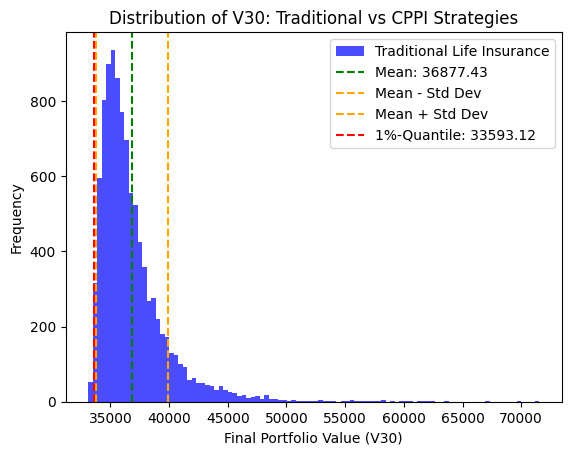

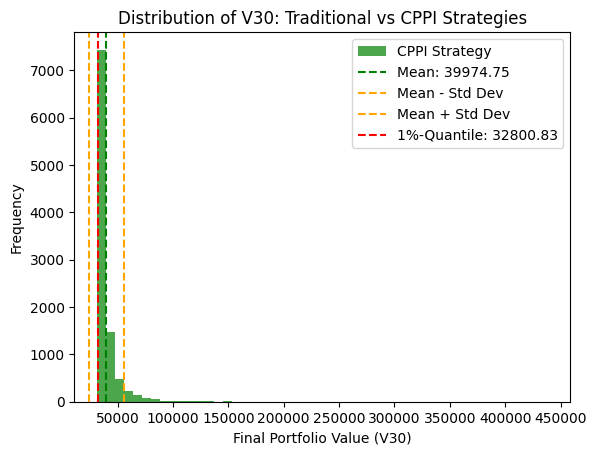

Mean of V30 (Traditional Life Insurance): 36877.43
1%-Quantile of V30 (Traditional Life Insurance): 33593.12
Mean of V30 (CPPI Strategy): 39974.75
1%-Quantile of V30 (CPPI Strategy): 32800.83


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
years = 30
annual_investment = 1000
mu = 0.03
sigma = 0.2
r_bar = 0.005
risk_free_rate = 0.01
num_simulations = 10000

# Function to calculate guaranteed amount G_k
def calculate_guaranteed(k, r_bar):
    return annual_investment * np.sum([np.exp(r_bar * j) for j in range(1, k + 1)])

# Simulation of traditional life insurance strategy
def simulate_traditional_strategy():
    final_values = []

    for _ in range(num_simulations):
        Z = np.random.normal(0, 1, years)  # Standard normal random variables
        risky_returns = np.exp(mu + sigma * Z)  # Yearly returns for the risky asset

        G_k = 0
        V_k = 0

        for k in range(1, years + 1):
            G_k = calculate_guaranteed(k, r_bar)
            bond_investment = G_k * np.exp(-risk_free_rate)
            risky_investment = V_k + annual_investment - bond_investment

            # Update portfolio value
            V_k = bond_investment * np.exp(risk_free_rate) + risky_investment * risky_returns[k - 1]

        final_values.append(V_k)

    return np.array(final_values)

# Simulation of CPPI strategy with leverage
def simulate_cpp_strategy():
    final_values = []

    for _ in range(num_simulations):
        Z = np.random.normal(0, 1, years)  # Standard normal random variables
        risky_returns = np.exp(mu + sigma * Z)  # Yearly returns for the risky asset

        G_k = 0
        V_k = 0

        for k in range(1, years + 1):
            G_k = calculate_guaranteed(k, r_bar)
            surplus = V_k + annual_investment - G_k * np.exp(-risk_free_rate)
            
            if surplus > 0:
                # Apply leverage of 2 on the surplus
                risky_investment = 2 * surplus
                bond_investment = V_k + annual_investment - risky_investment
            else:
                # Invest entirely in the bond if falling behind the guarantee
                bond_investment = V_k + annual_investment
                risky_investment = 0

            # Update portfolio value
            V_k = bond_investment * np.exp(risk_free_rate) + risky_investment * risky_returns[k - 1]

        final_values.append(V_k)

    return np.array(final_values)

# Run simulations
traditional_values = simulate_traditional_strategy()
cppi_values = simulate_cpp_strategy()

# Calculate metrics for traditional strategy
mean_traditional = np.mean(traditional_values)
std_traditional = np.std(traditional_values)
one_percentile_traditional = np.percentile(traditional_values, 1)

# Calculate metrics for CPPI strategy
mean_cpp = np.mean(cppi_values)
std_cpp = np.std(cppi_values)
one_percentile_cpp = np.percentile(cppi_values, 1)

# Plot histograms
plt.figure
plt.hist(traditional_values, bins=100, alpha=0.7, color='blue', label='Traditional Life Insurance')
plt.axvline(mean_traditional, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_traditional:.2f}')
plt.axvline(mean_traditional - std_traditional, color='orange', linestyle='--', linewidth=1.5, label=f'Mean - Std Dev')
plt.axvline(mean_traditional + std_traditional, color='orange', linestyle='--', linewidth=1.5, label=f'Mean + Std Dev')
plt.axvline(one_percentile_traditional, color='red', linestyle='--', linewidth=1.5, label=f'1%-Quantile: {one_percentile_traditional:.2f}')

plt.xlabel('Final Portfolio Value (V30)')
plt.ylabel('Frequency')
plt.title('Distribution of V30: Traditional vs CPPI Strategies')
plt.legend()
plt.show()
plt.figure
plt.hist(cppi_values, bins=50, alpha=0.7, color='green', label='CPPI Strategy')
plt.axvline(mean_cpp, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_cpp:.2f}')
plt.axvline(mean_cpp- std_cpp, color='orange', linestyle='--', linewidth=1.5, label=f'Mean - Std Dev')
plt.axvline(mean_cpp + std_cpp, color='orange', linestyle='--', linewidth=1.5, label=f'Mean + Std Dev')
plt.axvline(one_percentile_cpp, color='red', linestyle='--', linewidth=1.5, label=f'1%-Quantile: {one_percentile_cpp:.2f}')

plt.xlabel('Final Portfolio Value (V30)')
plt.ylabel('Frequency')
plt.title('Distribution of V30: Traditional vs CPPI Strategies')
plt.legend()
plt.show()

# Print results
print(f"Mean of V30 (Traditional Life Insurance): {mean_traditional:.2f}")
print(f"1%-Quantile of V30 (Traditional Life Insurance): {one_percentile_traditional:.2f}")
print(f"Mean of V30 (CPPI Strategy): {mean_cpp:.2f}")
print(f"1%-Quantile of V30 (CPPI Strategy): {one_percentile_cpp:.2f}")


# Part e

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Define the file path (replace with the actual path where the file is saved)
file_path = 'datappm.xlsx'
data = pd.read_excel(file_path)

# Extract and clean the monthly returns
returns = data['Fondförsäkring'].dropna()

# Historical Simulation Setup
# Parameters
years = 30  # Number of years to simulate
trials = 10000  # Number of simulation trials
annual_investment = 1000  # Annual investment amount

# Historical simulation
def historical_simulation(returns, years, trials, annual_investment):
    final_values = []
    for _ in range(trials):
        portfolio_value = 0
        for _ in range(years):
            # Sample 12 random months to form a synthetic year
            sampled_months = np.random.choice(returns, size=12, replace=True)
            
            # Calculate the compounded annual return
            annual_return = np.prod(1 + sampled_months) - 1
            
            # Update portfolio value
            portfolio_value = (portfolio_value + annual_investment) * (1 + annual_return)
        
        final_values.append(portfolio_value)
    
    return np.array(final_values)

# Run the simulation
simulated_values = historical_simulation(returns, years, trials, annual_investment)

# Analyze results
mean_value = np.mean(simulated_values)
one_percentile = np.percentile(simulated_values, 1)

# Plot results
plt.hist(simulated_values, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Historical Simulation: Portfolio Value Distribution (Synthetic Year Sampling)')
plt.xlabel('Final Portfolio Value')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

# Print summary statistics
print(f"Mean Portfolio Value: {mean_value:.2f}")
print(f"1%-Quantile (Value-at-Risk): {one_percentile:.2f}")





FileNotFoundError: [Errno 2] No such file or directory: 'datappm.xlsx'